In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import mkl

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?


In [2]:
mkl.set_num_threads(16)

16

In [3]:
norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered@assays$RNA@data.csv')
norm_data = norm_data.T




In [4]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Cell_replicate_name_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered (1).csv',index_col = 0)
cell_identity

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Cells_Nuclei,Species_Type,Annotation,CellNames
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13415,3313,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAACCTGAGAGCTTCT
Maize_Cell1_AAAGCAAAGAACTGTA,Maize_Cell_1,8702,3189,13712,3231,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAAGCAAAGAACTGTA
Maize_Cell1_AAATGCCAGTAGCCGA,Maize_Cell_1,13018,4202,14150,4202,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCAGTAGCCGA
Maize_Cell1_AAATGCCCAATCTACG,Maize_Cell_1,12346,3915,13974,3913,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCCAATCTACG
Maize_Cell1_AACTGGTAGTGACTCT,Maize_Cell_1,6317,2726,13679,3038,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AACTGGTAGTGACTCT
...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Set_Nuclei_2,2585,1560,2583,1558,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACATTCAAGACGAC-1
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Set_Nuclei_2,2639,1549,2639,1549,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACGGGTCTTTCAGT-1
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Set_Nuclei_2,2516,1547,2516,1547,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGAACACAGTTGAAA-1
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Set_Nuclei_2,2570,1540,2569,1539,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGTCCACACTGCGTG-1


In [5]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']


In [6]:
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'

In [7]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'

In [8]:
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'

In [9]:
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
ortho_metaneighbor = norm_data.copy()
seurat_metaneighbor = norm_data.copy()

In [11]:
ortho_gene_list = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/AllGenesOrthologous.csv',index_col=0)
seurat_gene_list = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Seurat_Integrated_Genes.csv', names = ['Genes'])

In [12]:
ortho_gene_list

,x
1,Zm00001d027257
2,Zm00001d027259
3,Zm00001d027265
4,Zm00001d027266
5,Zm00001d027267
...,...
10587,Zm00001d003767
10588,Zm00001d003559
10589,Zm00001d026453
10590,Zm00001d048618


In [13]:
gene_panda_ortho = pd.DataFrame(index = ortho_metaneighbor.var.index)
gene_panda_seurat = pd.DataFrame(index = ortho_metaneighbor.var.index)
gene_panda_seurat['Seurat Gene Set'] = 0 
gene_panda_ortho['Orthology Gene Set'] = 0

In [14]:
gene_panda_ortho["Orthology Gene Set"].loc[gene_panda_ortho.index.isin(ortho_gene_list['x'].to_list())] = 1 
gene_panda_seurat['Seurat Gene Set'].loc[gene_panda_seurat.index.isin(seurat_gene_list['Genes'].to_list())] = 1

In [15]:
gene_panda_ortho

,Orthology Gene Set
Zm00001d027230,0
Zm00001d027231,0
Zm00001d027236,0
Zm00001d027239,0
Zm00001d027240,0
...,...
Sevir.9G535000,0
Sevir.9G535700,0
Sevir.J008600,0
Sevir.J014800,0


In [16]:
ortho_metaneighbor.var['highly_variable'] = gene_panda_ortho['Orthology Gene Set']

In [17]:
ortho_metaneighbor.var

,highly_variable
Zm00001d027230,0
Zm00001d027231,0
Zm00001d027236,0
Zm00001d027239,0
Zm00001d027240,0
...,...
Sevir.9G535000,0
Sevir.9G535700,0
Sevir.J008600,0
Sevir.J014800,0


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


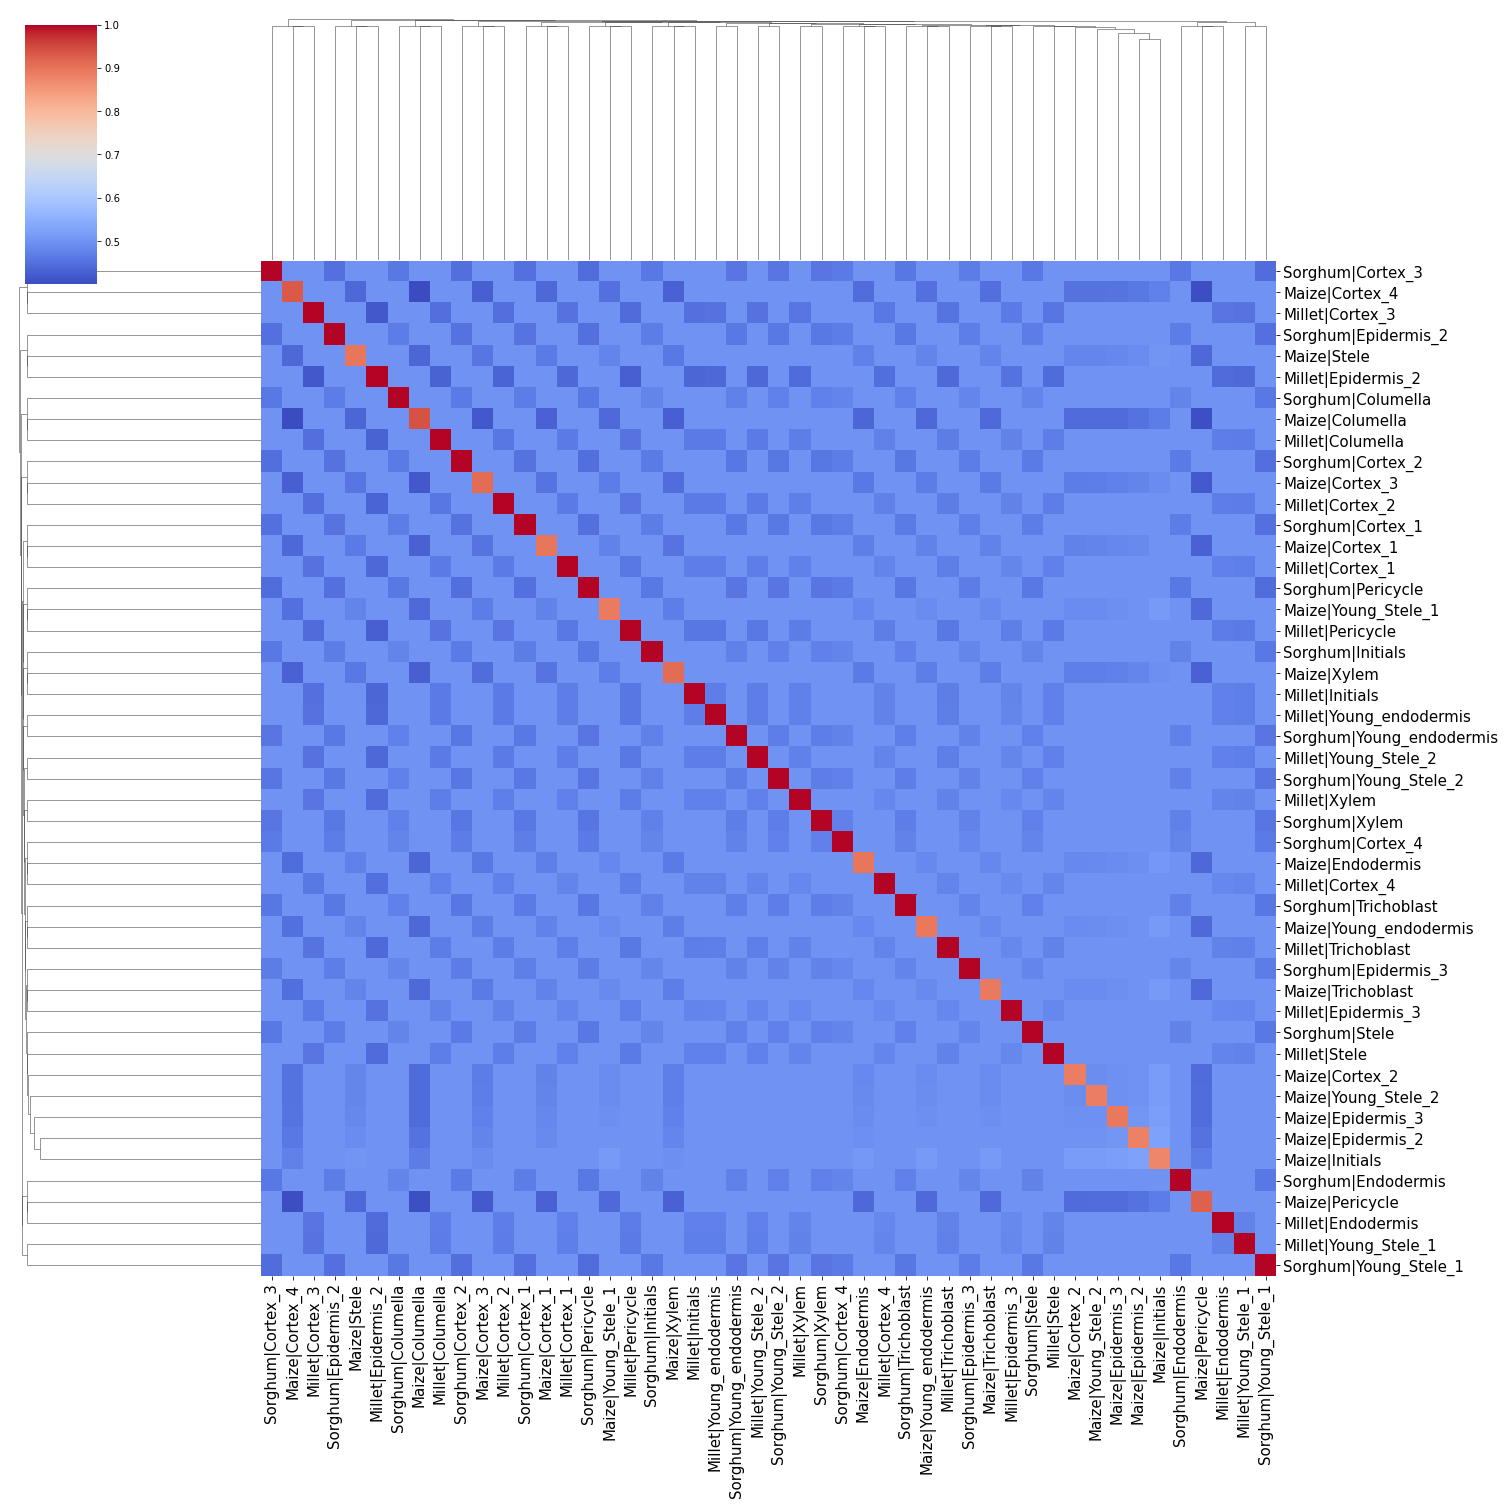

In [18]:
pymn.MetaNeighborUS(ortho_metaneighbor,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(ortho_metaneighbor,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)

In [19]:
#g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

In [20]:
seurat_metaneighbor.var['highly_variable'] = gene_panda_seurat['Seurat Gene Set']

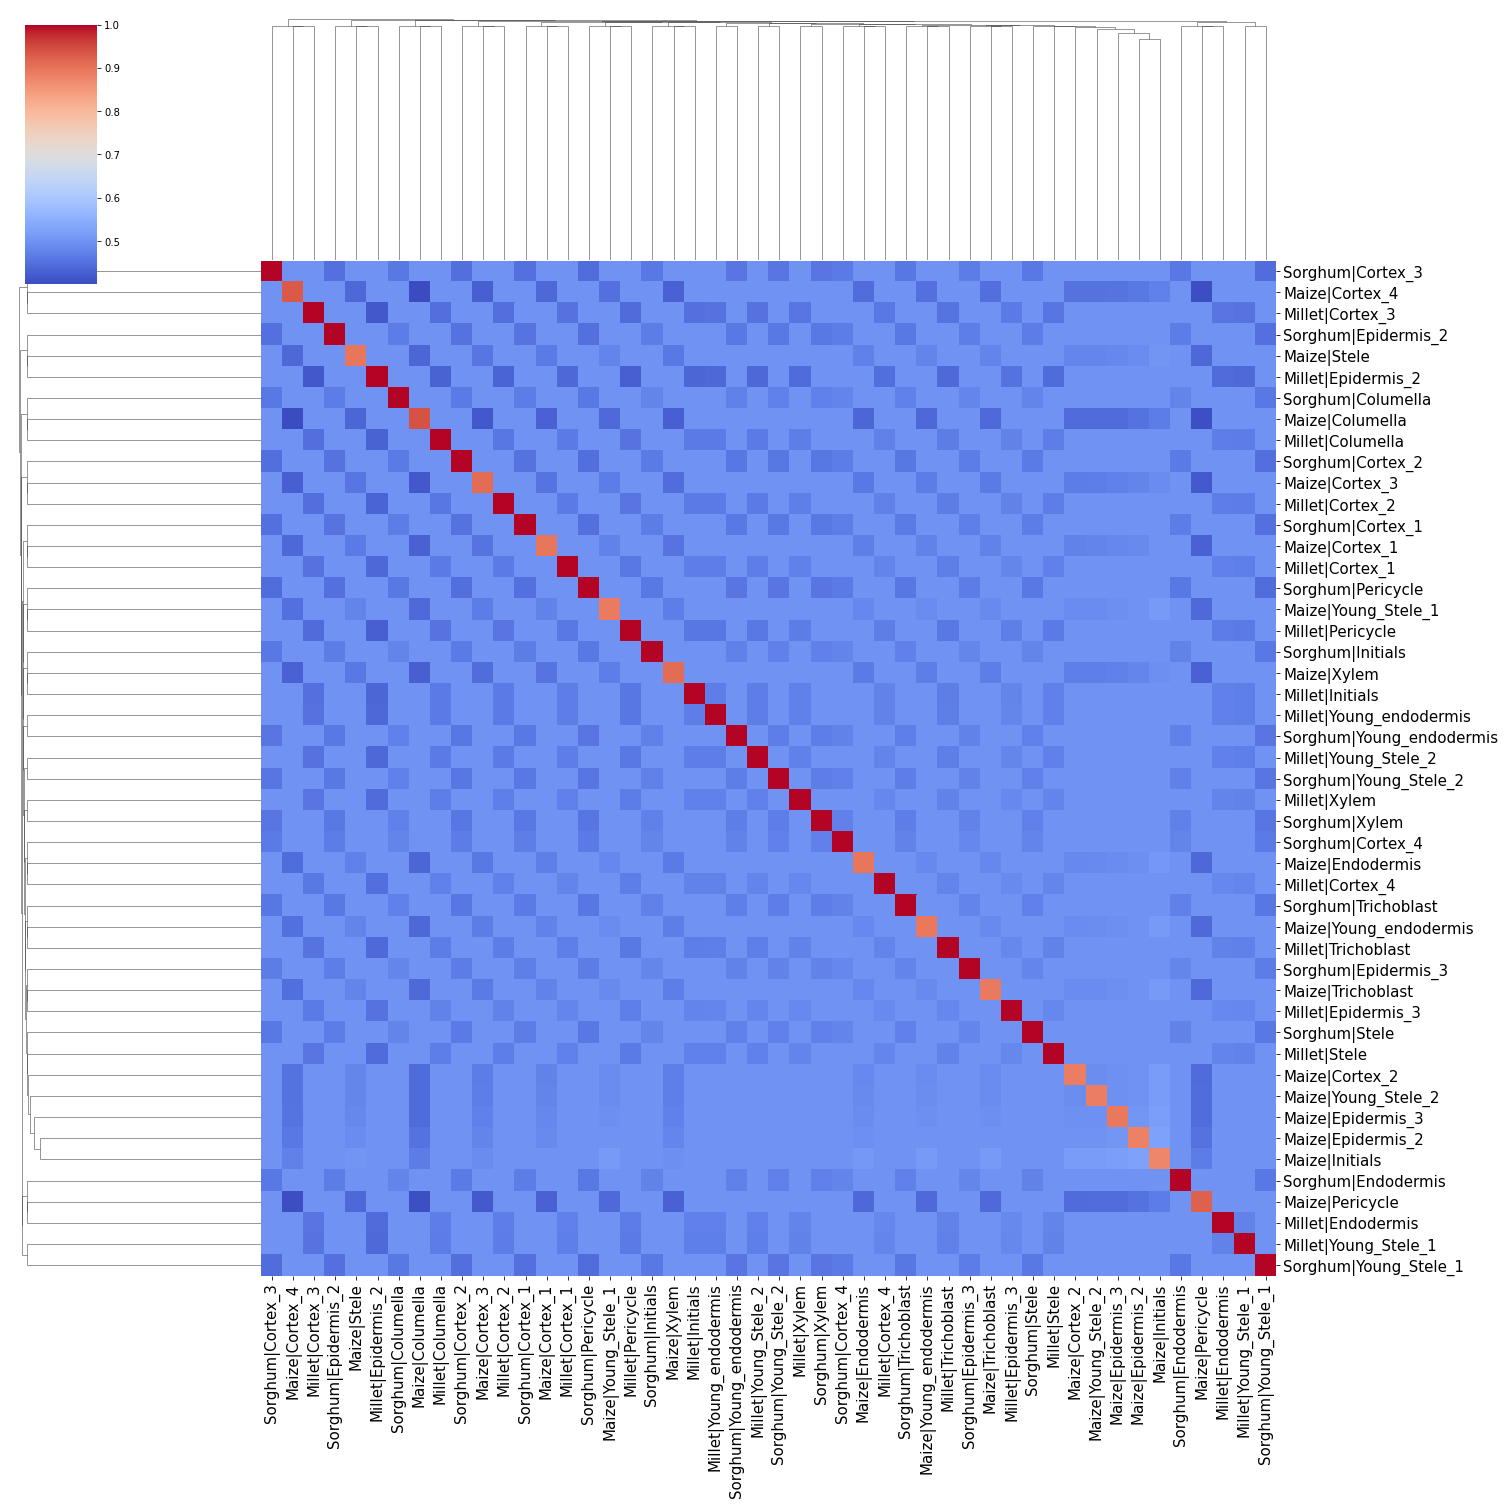

In [21]:
pymn.MetaNeighborUS(ortho_metaneighbor,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(ortho_metaneighbor,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)